# **A- Introduction to Image Segmentation with Unet Architecture:**
In this part we review the diffent computer vision tasks such a

#  1- **Computer vision Tasks**
 There are various levels of granularity in which the computers can gain an understanding of images. For each of these levels there is a task defined in the Computer Vision domain.let’s describe these problems below:
  
  
  **a. Image classification :**
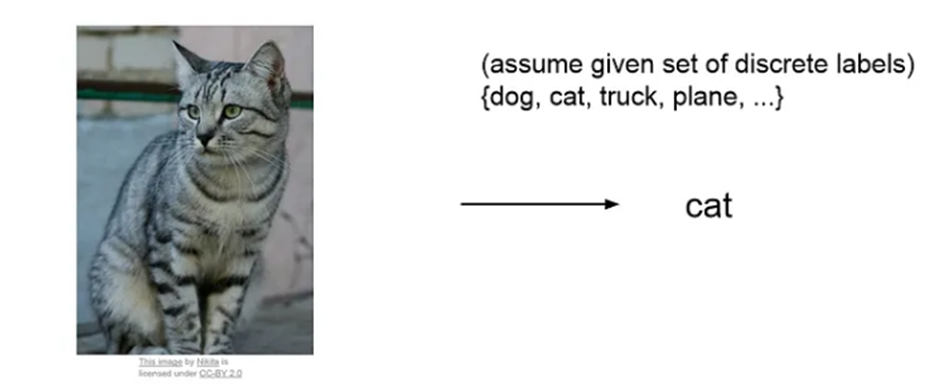

  The most fundamental building block in Computer Vision is the Image classification problem where given an image, we expect the computer to output a discrete label, which is the main object in the image.
  
  Different types of classification problems:
  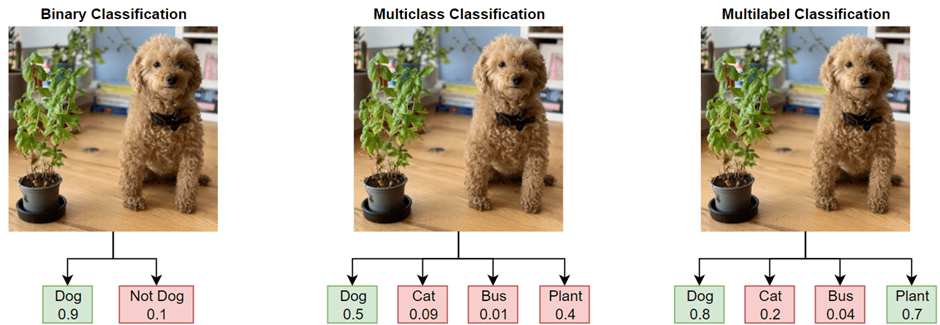

  **b. Classification with Localization**

  In localization along with the discrete label, we also expect the computer to localize where exactly the object is present in the image. This localization is typically implemented using a bounding box which can be identified by some numerical parameters with respect to the image boundary. In this case, the assumption is to have only one object per image.
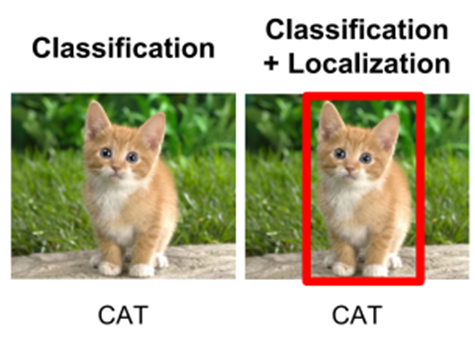

  **c. Object Detection**

  Object Detection extends localization to the next level where now the image is not constrained to have only one object, but can contain multiple objects. The task is to classify and localize all the objects in the image. Here again the localization is done using the concept of bounding boxes .
    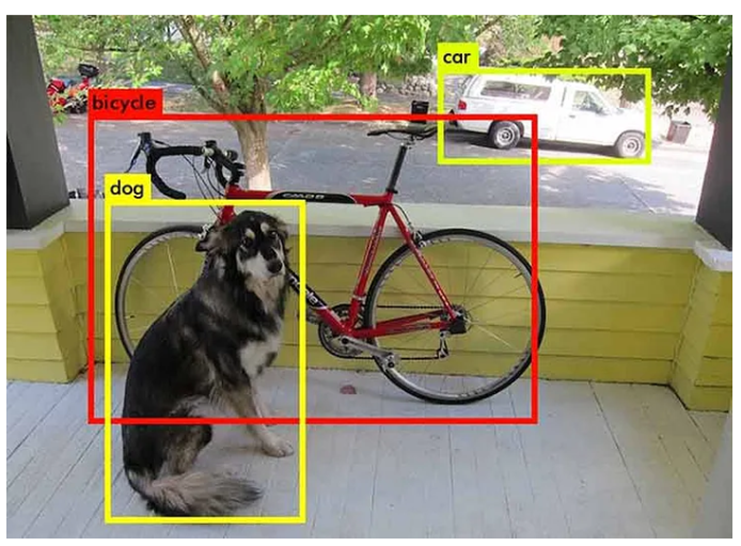


# **2- Intro to segmentation:**
In many visual tasks, especially in biomedical image processing, the desired output should include localization, i.e., a class label is supposed to be assigned to each pixel.

  **d. Semantic Segmentation:**


  The goal of semantic image segmentation is to label each pixel of an image with a corresponding class of what is being represented. Because we’re predicting for every pixel in the image, this task is commonly referred to as dense prediction.
  Note that unlike the previous tasks, the expected output in semantic segmentation are not just labels and bounding box parameters. The output itself is a high resolution image (typically of the same size as input image) in which each pixel is classified to a particular class. Thus it is a pixel level image classification.
  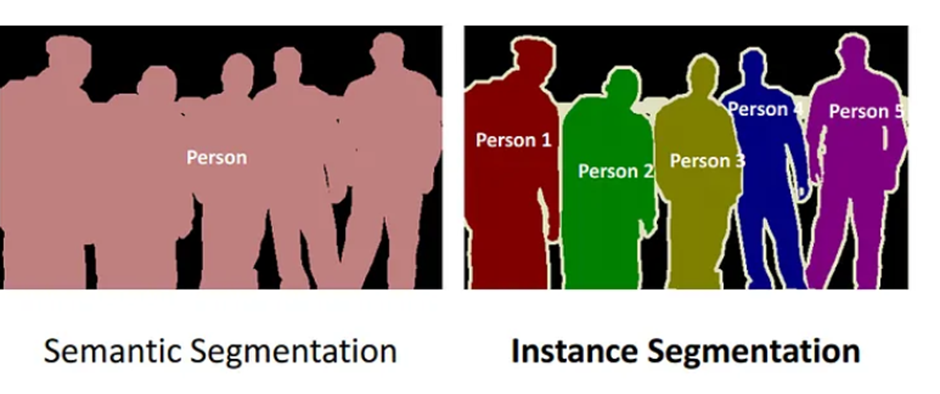

  **e. Instance segmentation:**

  Instance segmentation is one step ahead of semantic segmentation wherein along with pixel level classification, we expect the computer to classify each instance of a class separately.


# **3. Applications**

If you are wondering whether semantic segmentation is even useful or not, your query is reasonable. However, it turns out that a lot of complex tasks in Vision require this fine grained understanding of images. For example:

**a. Autonomous vehicles:**

Semantic Segmentation provides information about free space on the roads, as well as to detect lane markings and traffic signs.
refer to this video for an example https://www.youtube.com/watch?v=ATlcEDSPWXY

**b. Bio Medical Image Diagnosis:**
Machines can augment analysis performed by radiologists, greatly reducing the time required to run diagnostic tests.
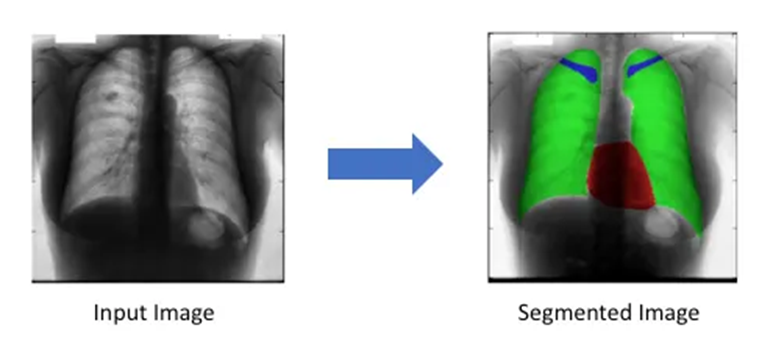



# **4- Understanding The U-Net Architecture:**

  **4.1- unet architecture Intuition :**

The U-Net architecture for semantic segmentation involves two main components: the initial part compresses the image using normal convolutions, reducing its spatial dimensions but increasing depth. In the second part, transpose convolutions expand the representation back to the original image size. An essential modification includes skip connections, where activations from earlier layers are directly copied to later layers. This integration of high-level contextual information from previous layers and fine-grained spatial details allows U-Net to make precise decisions about object regions, enhancing its semantic segmentation capabilities.
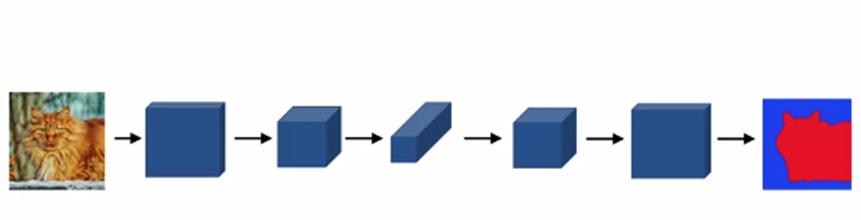

**The desired output is a segmentation map that looks like this:**
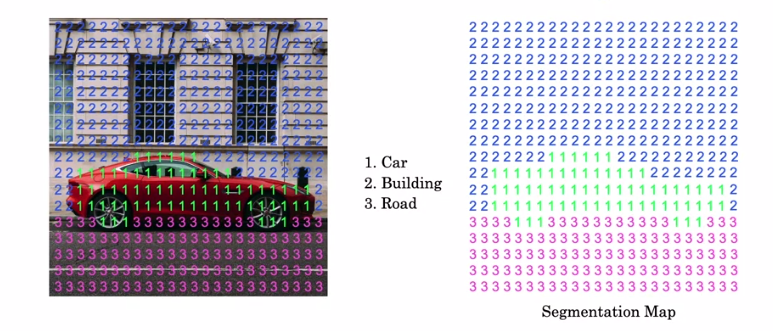
  
  **4.2- Network Architecture:**
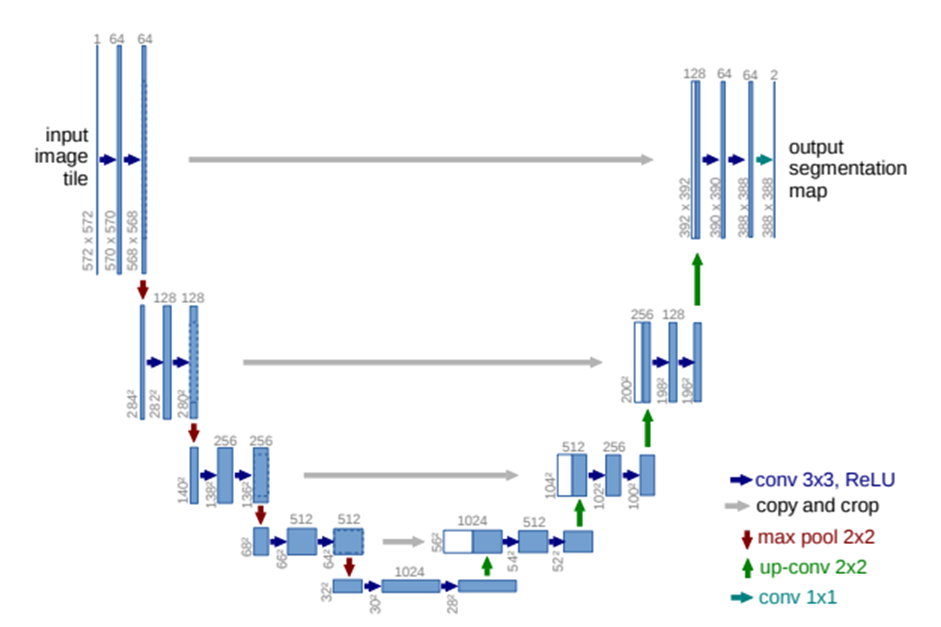

The architecture shows that an input image is passed through the model and then it is followed by a couple of convolutional layers with the ReLU activation function. We can notice that the image size is reducing from 572X572 to 570X570 and finally to 568X568. The reason for this reduction is because they have made use of unpadded convolutions (defined the convolutions as "valid"). Apart from that the unet architecture is composed of an encoder followed by a decoder.
The encoder block has a constant reduction of image size with the help of the max-pooling layers of strides 2. We also have repeated convolutional layers with an increasing number of filters in the encoder architecture. Once we reach the decoder aspect, we notice the number of filters in the convolutional layers start to decrease along with a gradual upsampling in the following layers all the way to the top. We also notice that the use of skip connections that connect the previous outputs with the layers in the decoder blocks.
This skip connection is a vital concept to preserve the loss from the previous layers so that they reflect stronger on the overall values.
In the final convolution block, we have a couple of convolutional layers followed by the final convolution layer. This layer has a filter of 2 with the appropriate function to display the resulting output. This final layer can be changed according to the desired purpose of the project you are trying to perform.


## **Transpose convolution**
The CNN layers we have seen so far, such as convolutional layers and pooling layers , typically reduce (downsample) the spatial dimensions (height and width) of the input, or keep them unchanged. In semantic segmentation that classifies at pixel-level, it will be convenient if the spatial dimensions of the input and output are the same. For example, the channel dimension at one output pixel can hold the classification results for the input pixel at the same spatial position.

To achieve this, especially after the spatial dimensions are reduced by CNN layers, we can use another type of CNN layers that can increase (upsample) the spatial dimensions of intermediate feature maps. In this section, we will introduce transposed convolution, which is also called fractionally-strided convolution (Dumoulin and Visin, 2016), for reversing downsampling operations by the convolution.

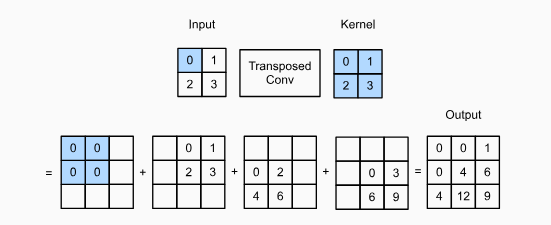

# **B- Semantic segmentation use case :Sattelite image Road  segmentation with Pytorch**


# **Part1: Data Loading & Transformation**

# install required libraries

In [ ]:
#albumentation for augmentations, and open cv which is  a powerful computer vision library with a wide range of functionalities for image and video processing.
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.0 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=94c7f2e3e155942a238184d48da5d940b885d286f51254bd294f4ce4c6baf293
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=ed65523071f79b54190da7243629f6256194fbfaef828271fad22c752cf0a077
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f53

# About Dataset

### Dataset

Here the dataset which we are going to use in this workshop is the subset(200 images and its masks) of the original dataset (Massachusetts Roads Dataset) consists of 1171 aerial images of the state of Massachusetts. Each image is 1500×1500 pixels in size, covering an area of 2.25 square kilometers

### Full Dataset

After compeletion of this workshop you can try the same pipeline on full dataset

https://www.cs.toronto.edu/~vmnih/data/

```
@phdthesis{MnihThesis,
author = {Volodymyr Mnih},
title = {Machine Learning for Aerial Image Labeling},
school = {University of Toronto},
year = {2013}
}
```

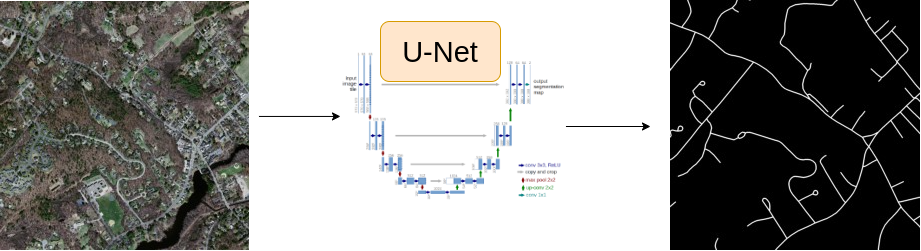

# Download Subset Dataset

In [ ]:
# Clone the subset dataset from a Git repository to the Colab environment
!git clone https://github.com/parth1620/Road_seg_dataset.git

Cloning into 'Road_seg_dataset'...
remote: Enumerating objects: 411, done.
remote: Total 411 (delta 0), reused 0 (delta 0), pack-reused 411
Receiving objects: 100% (411/411), 851.74 MiB | 47.77 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (401/401), done.
fatal: You must specify a repository to clone.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules

# Some Common Imports

In [ ]:
import sys
#adding the directory to the python path to make it easier to import modules and use them in the python env
sys.path.append('/content/Road_seg_dataset')

In [ ]:
import torch
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

import helper

# Setup Configurations

In [ ]:
CSV_FILE = '/content/Road_seg_dataset/train.csv'
DATA_DIR = '/content/Road_seg_dataset'

DEVICE =  'cuda'
#Set this to true if you have a previously saved checkpoint and you don't want to train from scratch
LOAD_MODEL=False

EPOCHS=25
LR=3e-3
BATCH_SIZE = 5
IMG_SIZE = 512
# Note: in a free Colab environement this usecase doesn't allow  BATCH_SIZE > 5;
    # EPOCHS=25 will take up to 25 min to complete so you'd probably want to change it

In [ ]:
#display the content of the csv file (used to make it possible to locate images and their corresponding masks )
df = pd.read_csv(CSV_FILE)
df.head()

images                  masks
0  images/17428750_15.png  masks/17428750_15.png
1  images/23279080_15.png  masks/23279080_15.png
2  images/24179185_15.png  masks/24179185_15.png
3  images/24179035_15.png  masks/24179035_15.png
4  images/11128810_15.png  masks/11128810_15.png

In [ ]:
#select the 2nd row
idx = 2
row = df.iloc[idx]
row

images    images/24179185_15.png
masks      masks/24179185_15.png
Name: 2, dtype: object

In [ ]:
idx = 100
row = df.iloc[idx]
#get the full path
image_path = DATA_DIR +'/'+ row.images
mask_path = DATA_DIR +'/'+ row.masks

# cv2 reads image in BGR format
image = cv2.imread(image_path)
# convert BGR to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# read mask in grayscale and scale it
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) / 255

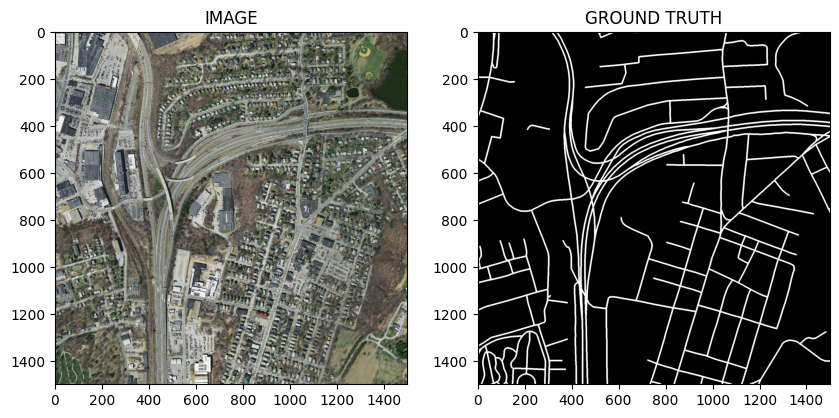

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('IMAGE')
ax1.imshow(image)

ax2.set_title('GROUND TRUTH')
ax2.imshow(mask,cmap = 'gray')

In [ ]:
#determines the train,test split where 20% test 70% train
train_df, valid_df = train_test_split(df,test_size=0.20,random_state=42)
len(train_df)

159

# Task 1 : Augmentation Functions
Create augmentation functions *'get_train_augs'* and *'get_valid_augs'* for training and validation data where you resize the images size to **IMG_SIZE = 512** , and apply **Horizontal** and **Vertical** flips

albumentation documentation : https://albumentations.ai/docs/

Make sure you write your code in this section before viewing the proposed solution

In [ ]:
import albumentations as A

#for segmentation task we apply augmentation on both mask and image
def get_train_augs():
  return None

#we don't apply augmentations on validation data just resizing
def get_valid_augs():
  return None

# Task 1 : Augmentation Functions
Here you can find the proposed solution , Please make sure you're running this part to avoid eventual bugs

In [ ]:
import albumentations as A

#for segmentation task we apply augmentation on both mask and image
def get_train_augs():
  return A.Compose([
      A.Resize(IMG_SIZE,IMG_SIZE),
      A.HorizontalFlip(p = 0.5),
      A.VerticalFlip(p = 0.5)
  ])
#we don't apply augmentations on validation data just resizing
def get_valid_augs():
  return A.Compose([
      A.Resize(IMG_SIZE,IMG_SIZE)
      ])

# Task 2 : Create Custom Dataset
In this task you're asked to fill in the missing code sections according to the provided comments
Note that an approximation of the number of lines of code is provided

In [ ]:
from torch.utils.data import Dataset

class SegmentationDataset(Dataset):

      def __init__(self,df,augmentations):
        self.df = df
        self.augmentations = augmentations

      def __len__(self):
        return len(self.df)

      def __getitem__(self,idx):
          row = self.df.iloc[idx]
          image_path = DATA_DIR +'/'+ row.images
          mask_path = DATA_DIR +'/'+ row.masks

          image = cv2.imread(image_path) # cv2 reads image in BGR format
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert BGR to RGB format

          mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) # (h,w)
          mask = np.expand_dims(mask, axis=-1)#(h,w,c)

          if self.augmentations:
            data = self.augmentations(image = image,mask=mask)
            image = data['image']
            mask = data['mask']

          #1- pytorch uses (c,h,w) convention so  we need to change order of axis
          #2- cast np array into float32 data type to ensure memory efficiency
          #code start

          #approximately 2 lines of code

          #code end

          #3- convert the resulting np array into torch tensor and scale it
          #code start

          #approximately 2 lines of code

          #code end
          return image,mask

# Task 2 : Create Custom Dataset
Here you can find the proposed solution , Please make sure you're running this part to avoid eventual Errors

In [ ]:
from torch.utils.data import Dataset

class SegmentationDataset(Dataset):

      def __init__(self,df,augmentations):
        self.df = df
        self.augmentations = augmentations

      def __len__(self):
        return len(self.df)

      def __getitem__(self,idx):
          row = self.df.iloc[idx]
          image_path = DATA_DIR +'/'+ row.images
          mask_path = DATA_DIR +'/'+ row.masks

          image = cv2.imread(image_path) # cv2 reads image in BGR format
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert BGR to RGB format

          mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) # (h,w)
          mask = np.expand_dims(mask, axis=-1)#(h,w,c)

          if self.augmentations:
            data = self.augmentations(image = image,mask=mask)
            image = data['image']
            mask = data['mask']

          #1- pytorch uses (c,h,w) convention so  we need to change order of axis
          #2- cast np array into float32 data type to ensure memory efficiency

          image = np.transpose(image,(2,0,1)).astype(np.float32)
          mask = np.transpose(mask,(2,0,1)).astype(np.float32)

          #3- convert the resulting np array into torch tensor and scale it
          image = torch.tensor(image)/255.0
          mask = torch.tensor(mask)/255.0
          return image,mask

# Task 3 : Create training set *'trainset'* and validation set *'validset'*

### **Hint:** use train_df,valid_df and the augmentation functions

In [ ]:
trainset =
validset =

# Task 3 : Create training set *'trainset'* and validation set *'validset'*
Here you can find the proposed solution , Please make sure to run this section to avoid eventual Errors

In [ ]:
trainset = SegmentationDataset(train_df,get_train_augs())
validset = SegmentationDataset(valid_df,get_valid_augs())

# Visualization

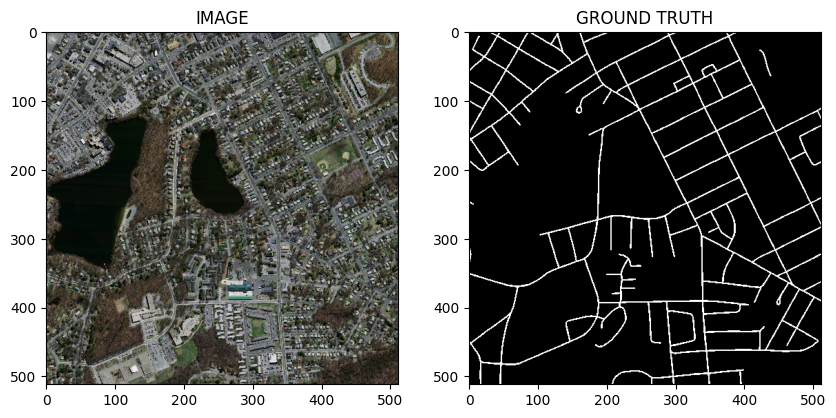

In [ ]:
idx = 4
image,mask = trainset[idx]
helper.show_image(image,mask)

# Task 4: Load dataset into batches
in this task you need to use the pytorch dataloader to load dataset into **BATCH_SIZE** batches , and make sure to introduce randomness into the training data loader

In [ ]:
from torch.utils.data import DataLoader

train_loader =
valid_loader =

# Task 4: Load dataset into batches
Here you find the proposed solution

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(trainset,batch_size=BATCH_SIZE, shuffle = True)
#we don't shuffle the valid and test datasets cause we want these to be as close as possible the serving data
valid_loader = DataLoader(validset,batch_size=BATCH_SIZE)

In [ ]:
print(f'total number of batches in train loader {len(train_loader)}')
print(f'total number of batches in valid loader {len(valid_loader)}')

total number of batches in train loader 32
total number of batches in valid loader 8


In [ ]:
for images,masks in train_loader:
  print(f'One batch image shape:{images.shape}')
  print(f'One batch mask shape:{masks.shape}')
  break;

One batch image shape:torch.Size([5, 3, 512, 512])
One batch mask shape:torch.Size([5, 1, 512, 512])


# **Part 02: Model Training & Validation**

# Task 6 : Create Segmentation model (UNET)
Please follow the instructions in the comments to fill the missing code of cthe DoubleConv class and try to answer the questions bellow

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF


class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()

        #create a sequential conv block from the information provided in the unet architecture
        #knowing that it uses a stride of 1 and a padding of 1 ,Also add a batch normalization layer,
        self.conv = nn.Sequential(
          #code start
          #Approximately 6 lines of code
          #code end
        )


    def forward(self, x):
        return self.conv(x)

In [ ]:
# Exercise Questions:
# 1. What is the purpose of using nn.BatchNorm2d in the DoubleConv module?
#    Your answer here: ________________________
#
# 2. Why is the bias set to False in the nn.Conv2d layers?
#    Your answer here: ________________________
#

In [ ]:
class Unet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1, features=[64, 128, 256, 512]):#out channel 1 (binary segm)

        super(Unet, self).__init__()

        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()

        #pool layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Down part of UNET
        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))#add a layer to module list
            in_channels = feature

        # Up part of UNET
        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(
                    feature*2, feature, kernel_size=2, stride=2,
                )
            )
            self.ups.append(DoubleConv(feature*2, feature))

        #the last down doubleConv
        self.bottleneck = DoubleConv(features[-1], features[-1]*2)

        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)#only changes the number of channels (1 in this case)

    def forward(self, images, masks=None):
        skip_connections = []

        for down in self.downs:
            images = down(images)
            skip_connections.append(images)
            images = self.pool(images)

        images = self.bottleneck(images)
        skip_connections = skip_connections[::-1]

        for idx in range(0, len(self.ups), 2):
            images = self.ups[idx](images)
            skip_connection = skip_connections[idx // 2]

            if images.shape != skip_connection.shape:
                images = TF.resize(images, size=skip_connection.shape[2:])

            concat_skip = torch.cat((skip_connection, images), dim=1)
            images = self.ups[idx + 1](concat_skip)

        logits = self.final_conv(images)

        if masks is not None:
            loss = nn.BCEWithLogitsLoss()(logits, masks)
            return logits, loss

        return logits


In [ ]:
#Take a look at the code provided above and Try to answer these questions concerning the Unet Architecture
#
#
# Exercise Questions:
# 1. Why is the ConvTranspose2d layer used in the upscalling part of the UNET architecture, and what is its effect?
#    Your answer here: ________________________
#
# 2. Why is the bottleneck layer used in the UNET architecture?
#    Your answer here: ________________________
#
# 3. Explain the purpose of the final_conv layer in the UNET.
#    Your answer here: ________________________
#
# 4. Discuss the role of skip connections in the UNET architecture and how they contribute to the model's performance.
#    Your answer here: ________________________
#

# Task 6 : Create Segmentation Model (UNET)
Here you will find the proposed solutions for the coding and knowledge Exercice

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF


class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()

        #create a sequential conv block from the information provided in the unet architecture representation add batch normalization layer
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),#no need to set the bias cause using batch norm
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels,kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.conv(x)

In [ ]:
# Exercise Answers:
# 1. What is the purpose of using nn.BatchNorm2d in the DoubleConv module, why is it before the activation function ?

#    Answer: The purpose of using Batch Normalization is  to normalize the input to the activation function
#            Batch normalization brings the activations to a similar scale,making the optimization process more stable and accelerating the training.
#            Batch normalization makes your hyperparameter search problem much easier, makes your neural network much more robust, and also enables much more easily train even very deep networks.
#
# 2. Why is the bias set to False in the nn.Conv2d layers?

#    Answer: The bias is set to False in the nn.Conv2d layers because Batch Normalization is used.
#            Batch norm will look at the mini batch and normalize Zl (aw+b) to have mean =0 so whatever is the value of the "bias " it's actually just gonna get substracted out
#

In [ ]:
class Unet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1, features=[64, 128, 256, 512]):#out channel 1 (binary segm)

        super(Unet, self).__init__()

        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()

        #pool layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Down part of UNET
        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))#add a layer to module list
            in_channels = feature

        # Up part of UNET
        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(
                    feature*2, feature, kernel_size=2, stride=2,
                )
            )
            self.ups.append(DoubleConv(feature*2, feature))

        #the last down doubleConv
        self.bottleneck = DoubleConv(features[-1], features[-1]*2)

        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)#only changes the number of channels (1 in this case)

    def forward(self, images, masks=None):
        skip_connections = []

        for down in self.downs:
            images = down(images)
            skip_connections.append(images)
            images = self.pool(images)

        images = self.bottleneck(images)
        skip_connections = skip_connections[::-1]

        for idx in range(0, len(self.ups), 2):
            images = self.ups[idx](images)
            skip_connection = skip_connections[idx // 2]

            if images.shape != skip_connection.shape:
                images = TF.resize(images, size=skip_connection.shape[2:])

            concat_skip = torch.cat((skip_connection, images), dim=1)
            images = self.ups[idx + 1](concat_skip)

        logits = self.final_conv(images)

        if masks is not None:
            loss = nn.BCEWithLogitsLoss()(logits, masks)
            return logits, loss

        return logits


In [ ]:
# Exercise Answers:
# 1. Why is the ConvTranspose2d layer used in the upscalling part of the UNET architecture, and what is its effect?

#    Answer: The ConvTranspose2d layer is used in the up part of the UNET architecture to perform upsampling or deconvolution.
#            It helps in increasing the spatial resolution of the feature maps.
#
# 2. Explain the purpose of the final_conv layer in the UNET.

#    Answer: The final_conv layer is responsible for producing the final output of the UNET architecture. It reduces the number of channels to match the desired output channels
#            The output represents the network's prediction for each pixel, indicating the likelihood of belonging to the target class.
#
# 3. Discuss the role of skip connections in the UNET architecture and how they contribute to the model's performance.

#    Answer: Skip connections in the UNET architecture serve a crucial role in preserving spatial information during the downsampling and upsampling processes.
#            They allow the network to skip certain layers during the upsampling phase and concatenate feature maps from the downsampling phase directly to the corresponding upsampling layers.
#            This helps in retaining fine-grained details and spatial context, mitigating the information loss that can occur during pooling and convolution operations.
#            Skip connections contribute to better segmentation performance, enabling the model to capture both local and global features effectively.
#

In [ ]:
#instanciate the model
model = Unet().to(DEVICE)

# Task 7 : Train & Validation functions
Fill in the missing lines of code to create correct training and validation functions.

Hint: The training loop typically involves three steps:

1. Calculate the loss.

2. Calculate the gradients to assess how each of the weights affects the loss.

3. Update the weights (optimize).

Also, don't forget to set the model in training and evaluation mode. Note that in PyTorch, gradients are accumulated by default.

In [ ]:
def train_fn(dataloader,model,optimizer):
  #set up the mode

  #code starts here
  #1 line of code
  #code ends here
  total_loss = 0.0

  for images,masks in tqdm(dataloader):
    images = images.to(DEVICE)
    masks = masks.to(DEVICE)

    #training loop step
    #code starts here
    #Approximately 4 lines of code
    #code ends here

    #add batch loss to total loss
    #code starts here
    #Approximately 1 line of code
    #code ends here
  return total_loss/len(dataloader) #avg tital loss by number of batches

In [ ]:
def eval_fn(dataloader,model):

 #code starts here
 #approximately 1 line of code
 #code ends here

  total_loss = 0.0

  for images,masks in tqdm(dataloader):
    images = images.to(DEVICE)
    masks = masks.to(DEVICE)
    #code starts here
    #Approximately 2 lines of code
    #code ends here

  return total_loss/len(dataloader)

# Task 7 : Train & Validation functions
Here you'll find the proposed solution for the 7th task

In [ ]:
def train_fn(dataloader,model,optimizer):
  model.train()
  total_loss = 0.0

  for images,masks in tqdm(dataloader):
    images = images.to(DEVICE)
    masks = masks.to(DEVICE)

    optimizer.zero_grad()
    logits,loss = model(images,masks)
    loss.backward()
    optimizer.step()

    total_loss += loss.item() #add batch loss to total loss
  return total_loss/len(dataloader) #avg total loss by number of batches

In [ ]:
def eval_fn(dataloader,model):

  model.eval()

  total_loss = 0.0

  for images,masks in tqdm(dataloader):
    images = images.to(DEVICE)
    masks = masks.to(DEVICE)

    logits,loss = model(images,masks)

    total_loss += loss.item()

  return total_loss/len(dataloader)

# Utils Functions

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics.classification import BinaryAccuracy

def check_accuracy(loader, model, device="cuda"):
    model.eval() #eval mode disables dropout & batch norm
    model.to(device)

    with torch.no_grad(): #without gradient tracking
        for image, mask in loader:
            image = image.to(device)
            mask = mask.to(device)
            logits_mask = model(image.to(DEVICE))

            pred_mask = torch.sigmoid(logits_mask[:, 0, :, :])
            accuracy = BinaryAccuracy(threshold=0.5).to(device)
            accuracy.update(pred_mask.view(-1), mask[:, 0, :, :].view(-1))

    accuracy = accuracy.compute().item()
    print(f"Accuracy: {accuracy:.2f}")

    return accuracy

In [ ]:
def save_checkpoint(state, filename="model_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)

In [ ]:
def load_checkpoint(checkpoint, model):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])

# Model Training

Choosing the optimizer is a crucial step in the hyperparameter tuning process, with the potential to significantly enhancing your model's performance. If you're eager to experiment with various optimizers, you can explore a variety of options provided by PyTorch. Check out the following link for a comprehensive list of optimizers available in PyTorch:
https://pytorch.org/docs/stable/optim.html

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=LR)

In [ ]:
import timeit

if LOAD_MODEL:#load a saved pytorch model checkpoint
    load_checkpoint(torch.load("model_checkpoint.pth.tar"), model)
    print("checking accuracy of the checkpoint==>")
    check_accuracy(valid_loader, model, device=DEVICE)

best_loss = np.Inf

start = timeit.default_timer() # Measuring the time
for i in range(EPOCHS):

  train_loss= train_fn(train_loader,model,optimizer)
  val_loss= eval_fn(valid_loader,model)
  print(f'EPOCH {i+1} Train Loss {train_loss} Val Loss {val_loss}')

  checkpoint = {
                  "state_dict": model.state_dict(),
                  "optimizer":optimizer.state_dict(),
              }
  save_checkpoint(checkpoint)

print(f"The time taken to train was: {round((timeit.default_timer() - start) / 60, 2)} min")

In [ ]:
    #check the accuracy of the saved checkpoint
    load_checkpoint(torch.load("model_checkpoint.pth.tar"), model)
    print("checking accuracy of the checkpoint==>")
    check_accuracy(valid_loader, model, device=DEVICE)

# **Part 03: Model Inference**

In [ ]:
idx = 20
load_checkpoint(torch.load("model_checkpoint.pth.tar"), model)
image,mask =  validset[idx]

logits_mask = model(image.to(DEVICE).unsqueeze(0))#add extra dimention (c,h,w)-->(batches,c,h,w)
pred_mask = torch.sigmoid(logits_mask)
#you can adjust the threshold to get more precise results
pred_mask =(pred_mask > 0.19)*1.0 #consider it as 1


=> Loading checkpoint


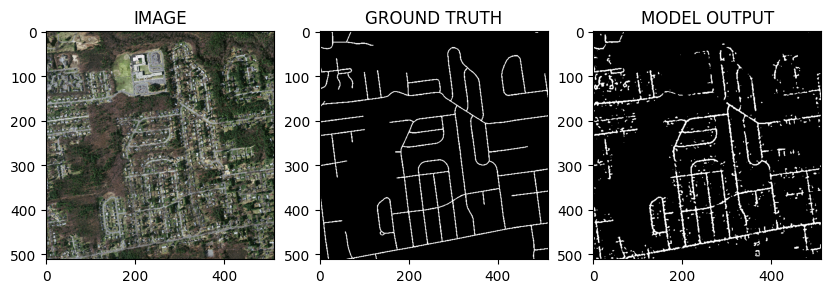

In [ ]:
helper.show_image(image,mask,pred_mask.detach().cpu().squeeze(0))

# **C-Semantic Segmentation:Satellite image Road Segmentation with Pytorch Lightning**

In [ ]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 7.3 MB/s eta 0:00:00


# 1- Lightning module
A Lightning Module is essentially a PyTorch module but with additional structure and methods provided by the Lightning framework. It enforces a specific structure for your model, training, and evaluation logic, separating these components into distinct methods. This can make your code more readable, modular, and easier to maintain.

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF
import pytorch_lightning as pl
import math
from torchmetrics.classification import BinaryAccuracy

class DoubleConv(pl.LightningModule):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias= False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias= False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        return self.conv(x)

class pl_UNET(pl.LightningModule):
    def __init__(self, in_channels: int=3, out_channels: int=1, features=[64,128,256,512], learning_rate=1e-4):
        super().__init__()
        self.learning_rate = learning_rate
        self.down = nn.ModuleList()
        self.up = nn.ModuleList()
        self.pool = nn.MaxPool2d(2, 2)
        for feature in features:
            self.down.append(DoubleConv(in_channels, feature))
            in_channels=feature
        for feature in reversed(features):
            self.up.append(
                nn.ConvTranspose2d(feature*2, feature, 2, 2)
            )
            self.up.append(
                DoubleConv(feature*2, feature) # x gets concat to 2xchannel
            )
        self.bottleneck = DoubleConv(features[-1], features[-1]*2)
        self.final_conv = nn.Conv2d(features[0], out_channels, 1)
        self.loss_fn = nn.BCEWithLogitsLoss()
        self.accuracy = BinaryAccuracy(threshold=0.5).to(DEVICE)

    def forward(self, x):
        skip_connections = []
        for down in self.down:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)
        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1]
        for idx in range(0, len(self.up), 2):
            x = self.up[idx](x)
            skip_connection = skip_connections[idx//2]
            if x.shape != skip_connection.shape:
                x = TF.resize(x, size=skip_connection.shape[2:])
            concat_skip = torch.cat((skip_connection, x), dim=1) # Concat along channels (b, c, h, w)
            x = self.up[idx+1](concat_skip)
        return self.final_conv(x)

        return logits

    def training_step(self, batch, batch_idx):
        x, y = batch
        y = y.to(DEVICE)
        x = x.to(DEVICE)
        pred = self(x)
        loss = self.loss_fn(pred, y)
        pred_prob = torch.sigmoid(pred)

        acc = self.accuracy(pred_prob, y)

        self.log('train_loss', loss, logger = True)#by default TensorBoard logger
        self.log('val_acc', acc, prog_bar=True, logger=True)
        return {'loss': loss,'accuracy':acc}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y = y.to(DEVICE)
        x = x.to(DEVICE)
        pred = self(x)
        loss = self.loss_fn(pred, y)
        pred_prob = torch.sigmoid(pred)

        # Compute binary accuracy using torchmetrics BinaryAccuracy
        acc = self.accuracy(pred_prob, y)

        self.log('val_loss', loss, prog_bar=True, logger=True)
        self.log('val_acc', acc, prog_bar=True, logger=True)

        return {'loss': loss,'accuracy':acc}

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(params = self.parameters(), lr = self.learning_rate)
        return optimizer

In [ ]:
class SegmentationDataModule(pl.LightningDataModule):

    def __init__(self, train_transform,valid_transform, batch_size: int = 5):
        super().__init__()
        self.batch_size = batch_size
        self.train_transform = train_transform
        self.valid_transform = valid_transform

    def setup(self, stage = None):
        self.train_dataset = SegmentationDataset(train_df, self.train_transform)
        self.val_dataset = SegmentationDataset(valid_df,self.valid_transform)


    def train_dataloader(self):
        return torch.utils.data.DataLoader(self.train_dataset, self.batch_size,shuffle = True)

    def val_dataloader(self):
        return torch.utils.data.DataLoader(self.val_dataset, self.batch_size)

# **Training**

In [ ]:
CSV_FILE = '/content/Road_seg_dataset/train.csv'
DATA_DIR = '/content/Road_seg_dataset'

DEVICE =  'cuda'
LOAD_MODEL=False
EPOCHS=25
LR=3e-3
BATCH_SIZE = 5
IMG_SIZE = 512

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import os


train_transforms = get_train_augs()

val_transforms = get_valid_augs()

module =SegmentationDataModule(train_transforms,val_transforms)
model =pl_UNET()
if not os.path.isdir('./pl_UNET'): os.mkdir('./pl_UNET')

checkpointCallback = pl.callbacks.ModelCheckpoint(dirpath="./pl_UNET",
                                                  save_top_k=1,
                                                  monitor="val_loss",
                                                 filename='{epoch}-{val_loss:.3f}',
                                                 mode='min')#The callback will save the model when the validation loss decreases
#you need to use cuda for this to run correctly
  trainer = pl.Trainer(max_epochs=EPOCHS, accelerator='gpu', devices =1,
                     callbacks=[checkpointCallback], profiler='simple')



INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
import timeit
start = timeit.default_timer() # Measuring the time
trainer.fit(model, datamodule = module)
print(f"The time taken to train was: {round((timeit.default_timer() - start) / 60, 2)} min")

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type              | Params
-------------------------------------------------
0 | down       | ModuleList        | 4.7 M 
1 | up         | ModuleList        | 12.2 M
2 | pool       | MaxPool2d         | 0     
3 | bottleneck | DoubleConv        | 14.2 M
4 | final_conv | Conv2d            | 65    
5 | loss_fn    | BCEWithLogitsLoss | 0     
6 | accuracy   | BinaryAccuracy    | 0     
-------------------------------------------------
31.0 M    Trainable params
0         Non-trainable params
31.0 M    Total params
124.151   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=25` reached.
INFO:pytorch_lightning.profilers.profiler:FIT Profiler Report

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                               	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                       

The time taken to train was: 24.23 min


In [ ]:
# Load the checkpoint and move the model to the correct device
checkpoint = torch.load("/content/pl_UNET/epoch=24-val_loss=0.17875.ckpt")
load_checkpoint(checkpoint, model)
model.to(DEVICE)

# Get the input data
image, mask = validset[20]

# Move the input data to the same device as the model
image = image.to(DEVICE)
mask = mask.to(DEVICE)

# Add an extra dimension to the input image
image = image.unsqueeze(0)

# Forward pass
logits_mask = model(image)
pred_mask = torch.sigmoid(logits_mask)
pred_mask = (pred_mask > 0.19).float()  # Consider it as 1

image = image.squeeze(0).cpu()
mask= mask.cpu()
pred_mask= pred_mask.squeeze(0).cpu()

=> Loading checkpoint


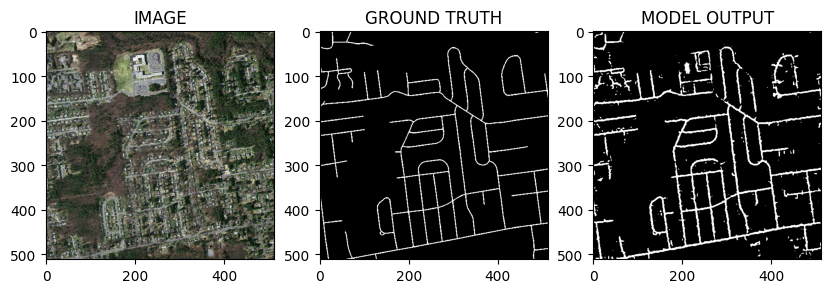

In [ ]:
helper.show_image(image,mask,pred_mask)

### **Additional Ressources:**
Here is a list of the materials I relied on for creating this notebook



*   The official Pytorch documentation website :https://pytorch.org/docs/stable/index.html
*   The official pytorch lightning documentation website:https://lightning.ai/docs/pytorch/stable/



*   The official paper of Unet architecture:https://arxiv.org/abs/1505.04597


*   https://d2l.ai/chapter_computer-vision/transposed-conv.html



*   convolutional-neural-networks course on Coursera:https://www.coursera.org
*   Aerial image segmentation guided project coursera:https://www.coursera.org

*   https://encord.com/blog/guide-to-semantic-segmentation/
*   https://www.jeremyjordan.me/semantic-segmentation/




